In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data=pd.read_csv("housing.csv")#read the data

In [43]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [44]:
data.info()#to get the information of the data and see if null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
data.dropna(inplace=True)#drop the missing values

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [47]:
from sklearn.model_selection import train_test_split#split the data into train and test

x=data.drop(['median_house_value'],axis=1)#drop the target variable
y=data['median_house_value']#target variable

In [48]:
x#independent variables

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [49]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)#split the data into training and testing data, 0.2 tells 20% of data is reserved for testing

In [51]:
x_train#75% of data that is 15324 columns remains in train data while 25% of data that is 5109 columns remains in test data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19692,-121.61,39.13,33.0,2559.0,539.0,1583.0,504.0,1.4727,INLAND
5899,-118.31,34.16,37.0,2144.0,446.0,860.0,435.0,3.9464,<1H OCEAN
7921,-118.08,33.86,26.0,778.0,173.0,539.0,186.0,3.2679,<1H OCEAN
13993,-116.99,34.89,24.0,2741.0,577.0,1551.0,522.0,3.4740,INLAND
14546,-117.26,32.95,15.0,1882.0,233.0,704.0,219.0,6.9794,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15317,-117.36,33.20,19.0,2129.0,562.0,1323.0,525.0,2.9539,NEAR OCEAN
19116,-122.65,38.23,52.0,1735.0,347.0,712.0,343.0,3.1711,<1H OCEAN
18209,-122.06,37.40,21.0,12855.0,3226.0,7273.0,3052.0,4.3351,NEAR BAY
12387,-116.37,33.72,19.0,6190.0,1355.0,2242.0,1043.0,3.0021,INLAND


In [52]:
train_data=x_train.join(y_train)#join the training data

In [53]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
19692,-121.61,39.13,33.0,2559.0,539.0,1583.0,504.0,1.4727,INLAND,53000.0
5899,-118.31,34.16,37.0,2144.0,446.0,860.0,435.0,3.9464,<1H OCEAN,315000.0
7921,-118.08,33.86,26.0,778.0,173.0,539.0,186.0,3.2679,<1H OCEAN,236500.0
13993,-116.99,34.89,24.0,2741.0,577.0,1551.0,522.0,3.4740,INLAND,70500.0
14546,-117.26,32.95,15.0,1882.0,233.0,704.0,219.0,6.9794,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
15317,-117.36,33.20,19.0,2129.0,562.0,1323.0,525.0,2.9539,NEAR OCEAN,169900.0
19116,-122.65,38.23,52.0,1735.0,347.0,712.0,343.0,3.1711,<1H OCEAN,200800.0
18209,-122.06,37.40,21.0,12855.0,3226.0,7273.0,3052.0,4.3351,NEAR BAY,267400.0
12387,-116.37,33.72,19.0,6190.0,1355.0,2242.0,1043.0,3.0021,INLAND,152300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

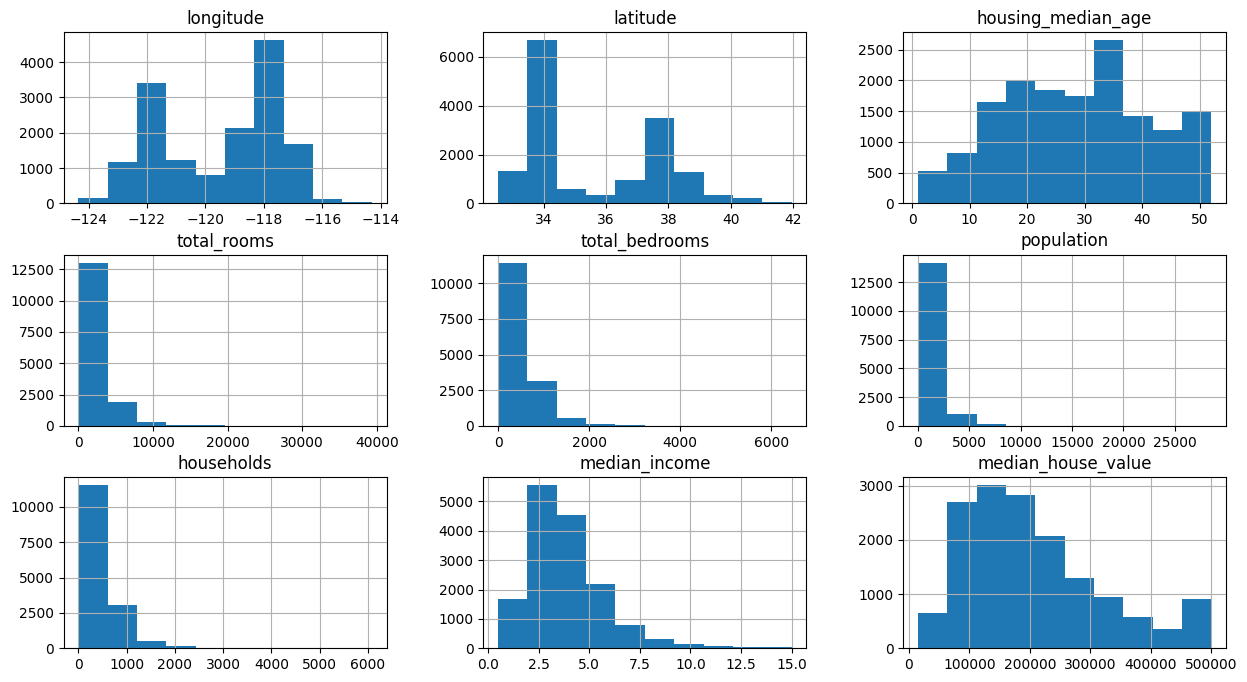

In [54]:
train_data.hist(figsize=(15,8))

In [55]:
train_data.select_dtypes(include=[np.number]).corr()#correlation matrix of the data to see the correlation between the variables


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925053,-0.113802,0.041208,0.065404,0.096711,0.053013,-0.016914,-0.047224
latitude,-0.925053,1.000000,0.019883,-0.034450,-0.064521,-0.106540,-0.069246,-0.080036,-0.143559
housing_median_age,-0.113802,0.019883,1.000000,-0.358754,-0.321357,-0.302625,-0.304096,-0.120087,0.101316
total_rooms,0.041208,-0.034450,-0.358754,1.000000,0.931137,0.866973,0.919652,0.199318,0.135255
total_bedrooms,0.065404,-0.064521,-0.321357,0.931137,1.000000,0.889010,0.980317,-0.004111,0.052112
population,0.096711,-0.106540,-0.302625,0.866973,0.889010,1.000000,0.917376,0.007149,-0.021072
households,0.053013,-0.069246,-0.304096,0.919652,0.980317,0.917376,1.000000,0.017042,0.067757
median_income,-0.016914,-0.080036,-0.120087,0.199318,-0.004111,0.007149,0.017042,1.000000,0.687791
median_house_value,-0.047224,-0.143559,0.101316,0.135255,0.052112,-0.021072,0.067757,0.687791,1.000000


<Axes: >

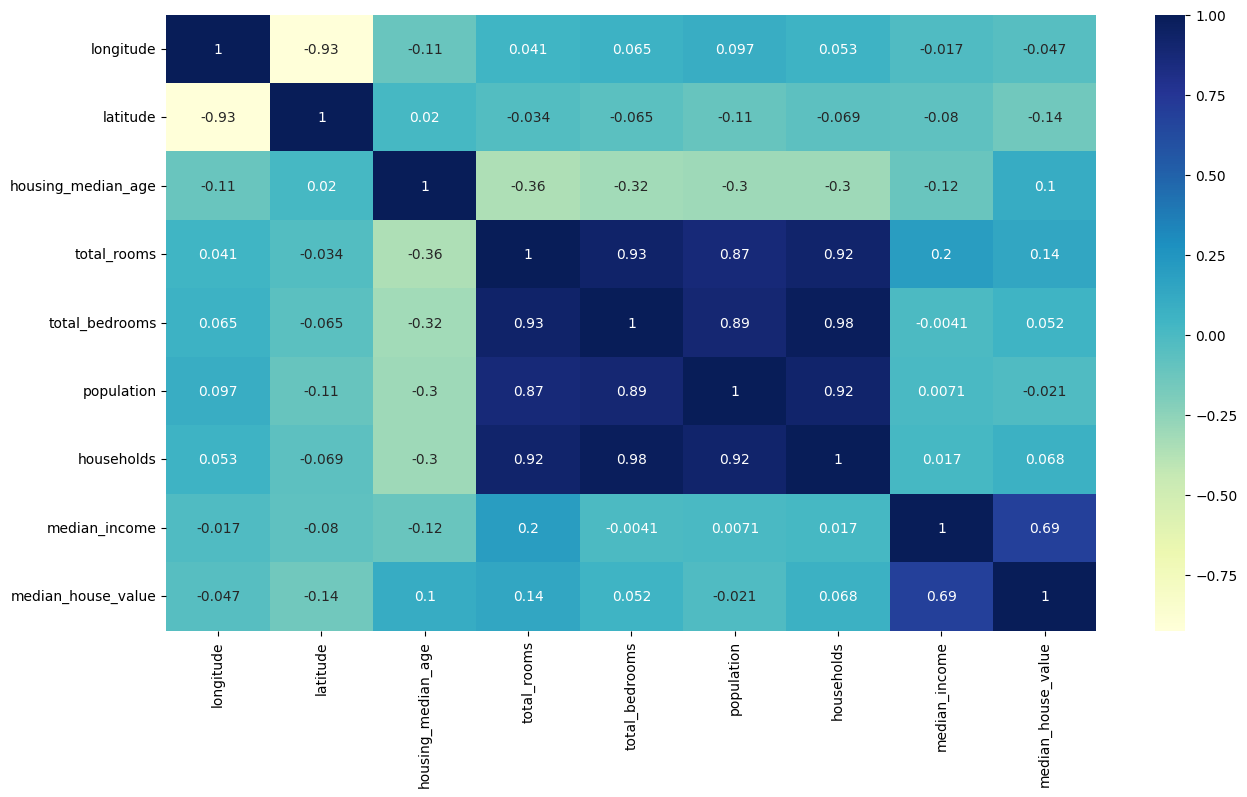

In [56]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=[np.number]).corr(),annot=True,cmap="YlGnBu")

In [57]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1#log transformation of the variable

In [58]:
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

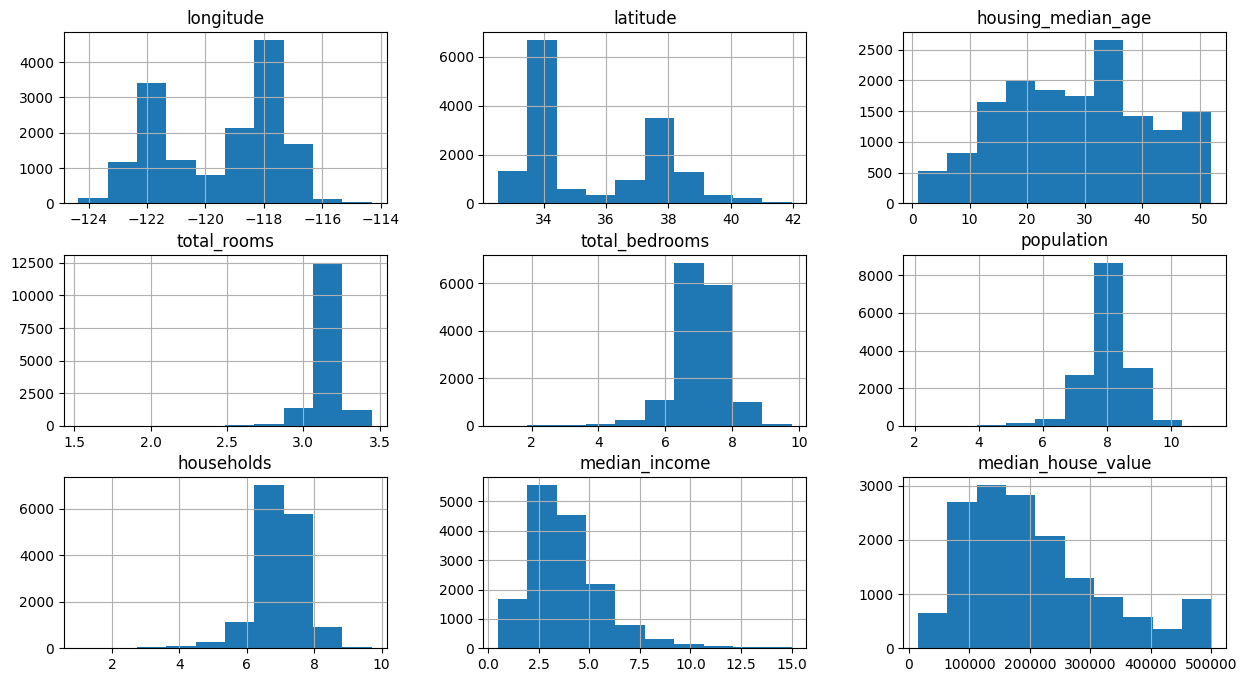

In [59]:
train_data.hist(figsize=(15,8))

In [60]:
train_data.ocean_proximity.value_counts()#count of the values in the column

ocean_proximity
<1H OCEAN     6809
INLAND        4828
NEAR OCEAN    1991
NEAR BAY      1693
ISLAND           3
Name: count, dtype: int64

In [61]:

train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)
#Making the string values in ocean proximity in to different features and dropping the original column

In [62]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
19692,-121.61,39.13,33.0,3.180120,7.289716,8.367077,7.222576,1.4727,53000.0,0,1,0,0,0
5899,-118.31,34.16,37.0,3.159918,7.100319,7.756932,7.075346,3.9464,315000.0,1,0,0,0,0
7921,-118.08,33.86,26.0,3.035585,6.153292,7.289716,6.225747,3.2679,236500.0,1,0,0,0,0
13993,-116.99,34.89,24.0,3.187856,7.357842,8.346655,7.257668,3.4740,70500.0,0,1,0,0,0
14546,-117.26,32.95,15.0,3.144772,6.451038,7.556778,6.389072,6.9794,500001.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317,-117.36,33.20,19.0,3.159108,7.331502,8.187657,7.263398,2.9539,169900.0,0,0,0,0,1
19116,-122.65,38.23,52.0,3.135203,6.849325,7.568078,6.837730,3.1711,200800.0,1,0,0,0,0
18209,-122.06,37.40,21.0,3.347701,9.078998,9.891924,9.023552,4.3351,267400.0,0,0,0,1,0
12387,-116.37,33.72,19.0,3.275285,8.211557,8.715124,7.949856,3.0021,152300.0,0,1,0,0,0


<Axes: xlabel='longitude', ylabel='latitude'>

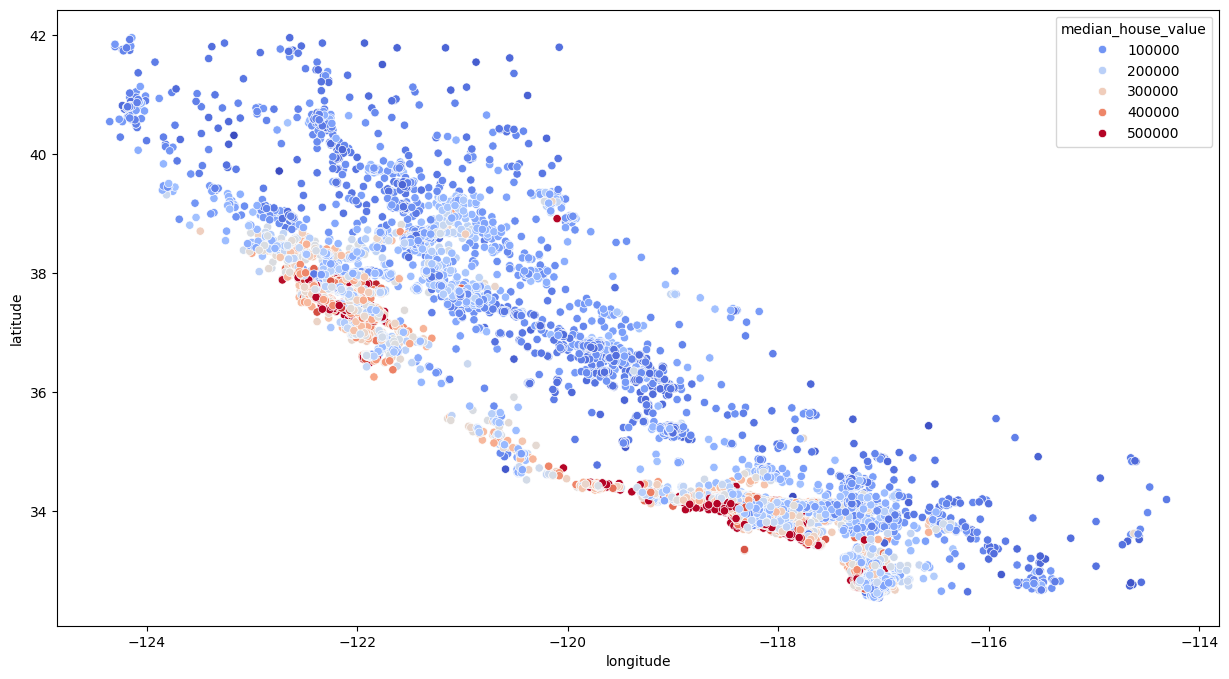

In [63]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude',y='latitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [64]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

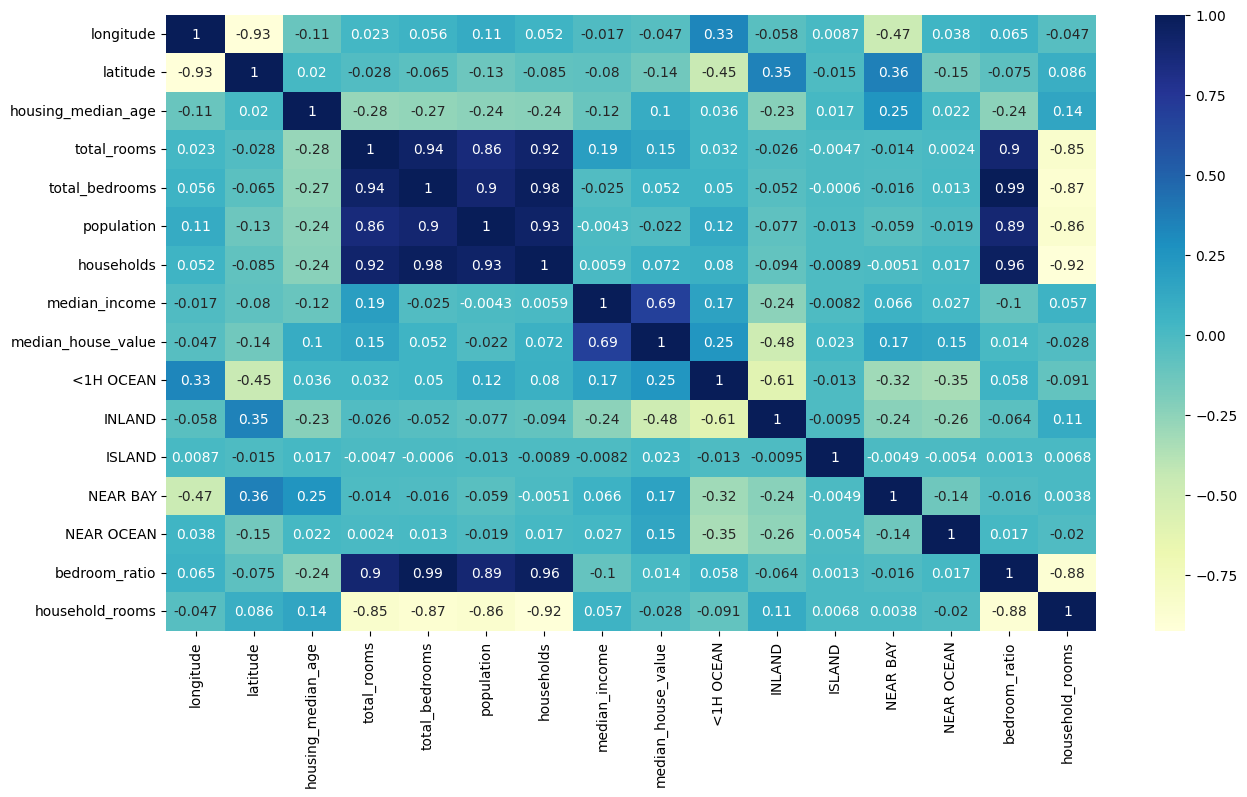

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='YlGnBu')

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)#scaling the data to make the data in same scale
reg=LinearRegression()#creating the model
reg.fit(x_train_s,y_train)#fitting the model

LinearRegression()

In [67]:
test_data =x_test.join(y_test) 

test_data['total_rooms'] = np.log(test_data['total_rooms']) + 1#log transformation of the variable
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']) + 1
test_data['population'] = np.log(test_data['population']) + 1
test_data['households'] = np.log(test_data['households']) + 1

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop('ocean_proximity',axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


<Axes: >

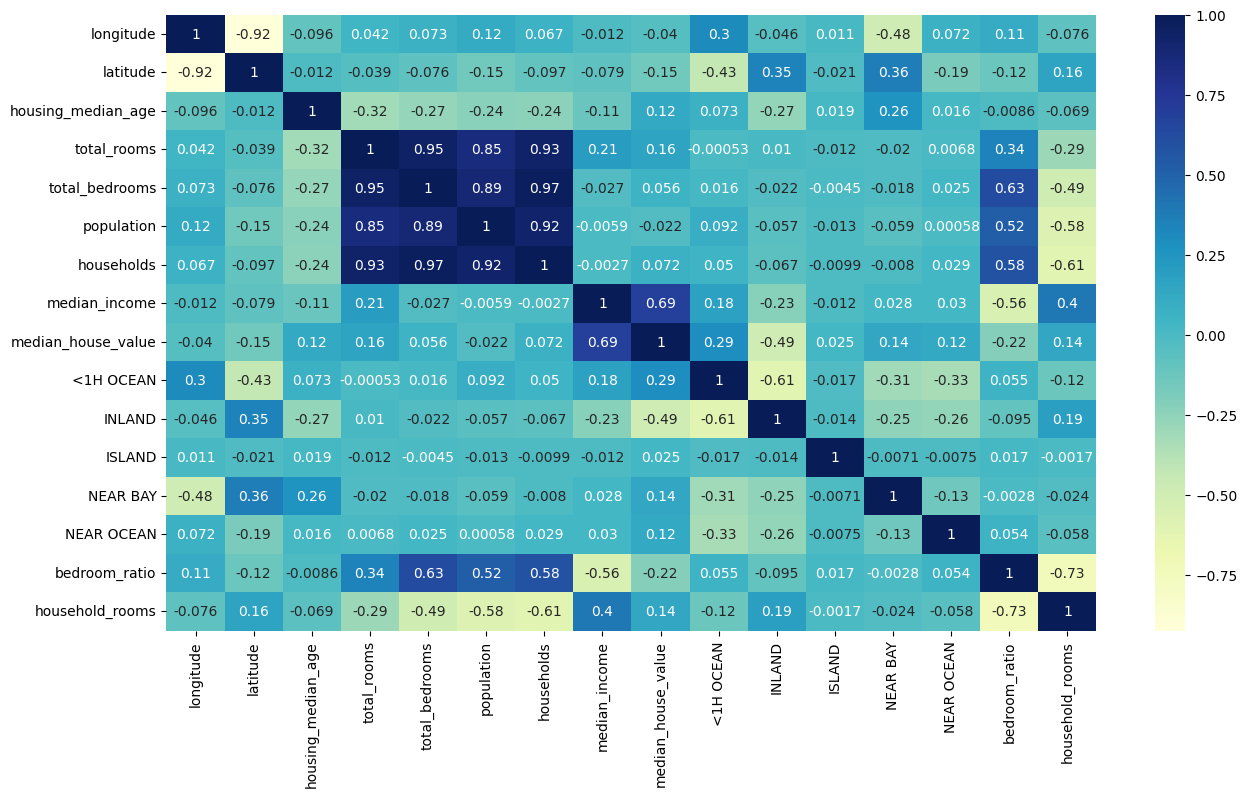

In [68]:
plt.figure(figsize=(15,8))
sns.heatmap(test_data.corr(),annot=True,cmap='YlGnBu')

In [69]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [71]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
19692,-121.61,39.13,33.0,3.180120,7.289716,8.367077,7.222576,1.4727,0,1,0,0,0,2.292277,0.440303
5899,-118.31,34.16,37.0,3.159918,7.100319,7.756932,7.075346,3.9464,1,0,0,0,0,2.246995,0.446610
7921,-118.08,33.86,26.0,3.035585,6.153292,7.289716,6.225747,3.2679,1,0,0,0,0,2.027053,0.487586
13993,-116.99,34.89,24.0,3.187856,7.357842,8.346655,7.257668,3.4740,0,1,0,0,0,2.308085,0.439240
14546,-117.26,32.95,15.0,3.144772,6.451038,7.556778,6.389072,6.9794,0,0,0,0,1,2.051354,0.492211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15317,-117.36,33.20,19.0,3.159108,7.331502,8.187657,7.263398,2.9539,0,0,0,0,1,2.320751,0.434935
19116,-122.65,38.23,52.0,3.135203,6.849325,7.568078,6.837730,3.1711,1,0,0,0,0,2.184651,0.458515
18209,-122.06,37.40,21.0,3.347701,9.078998,9.891924,9.023552,4.3351,0,0,0,1,0,2.712010,0.370996
12387,-116.37,33.72,19.0,3.275285,8.211557,8.715124,7.949856,3.0021,0,1,0,0,0,2.507128,0.411993


In [72]:
x_test_s=scaler.transform(x_test)

In [73]:
reg.score(x_test,y_test)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2241.3740832702224

In [74]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [75]:
forest.score(x_test,y_test)

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-4.135839877061247

In [76]:
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor()
param_grid={
    "n_estimators":[100,200,300],
    "max_features":[2,4],
    "max_depth": [None,4,8]
}

grid_search=GridSearchCV(forest,param_grid,cv=5,scoring = 'neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
best_forest=grid_search.best_estimator_

In [78]:
best_forest.score(x_test_s,y_test)

0.4823668100172124